# TSF Internship Program Task-1 

## Prediction using Supervised ML (by Uttkarsh Mishra)

### Step 1: Importing Data

In [36]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
# import data
student = pd.read_csv(r'F:\TSF Internship\Task 1\student_scores.csv')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [38]:
#info of dataset
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


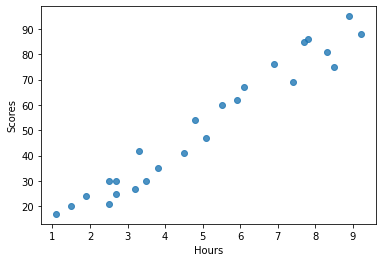

In [39]:
# visualise hours-scores relationship
sns.regplot(x="Hours", y="Scores", data=student, fit_reg=False)
plt.show()

### Step 2: Preparing Data for training and testing

In [40]:
X = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

In [41]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Step 3: Model Training

In [42]:
#training the model
reg= LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

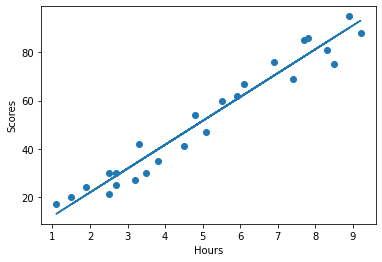

In [43]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [44]:
#predicting y
y_test_pred= reg.predict(X_test)

In [52]:
# Comparing Actual vs Predicted
final = pd.DataFrame({'Actual': y_test,'Predicted': y_test_pred})  
final.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Step 4: Model Evaluation

In [53]:
# Find the value of r squared
r2_score(y_test , y_test_pred)

0.9454906892105356

In [54]:
# Metrics to assess model performance 
rss = np.sum(np.square(y_test - y_test_pred)) # sum of the squared difference between the actual and the predicted values
print(rss)
mse = mean_squared_error(y_test, y_test_pred) # MSE is RSS divided by the number of observations
print(mse)
rmse = mse**0.5 # RMSE is square root of MSE 
print(rmse)

107.99384653608699
21.5987693072174
4.6474476121003665


### The End